<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/exam_prep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam Prep

- Lisa Broadhead
- June 8, 2022

## Objectives
1. Clean
2. Explore

#### In order to:
1. Understand where they should focus their next project
2. Strategies to use to have the biggest impact in increasing youth literacy rates 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "/content/drive/MyDrive/Colab Notebooks/coding_dojo/files/literacy_rates.csv"
df = pd.read_csv(file)
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


## 1. The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

**a.** Identify and address any duplicate values<br/>
**b.** Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the method you used to deal with missing values along with a justification for that method.<br/>
**c.** Ensure all columns match the data types listed in the data dictionary.<br/>
**d.** Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)<br/>
**e.** Identify and address any inappropriate or unusual data points (example: age cannot be 325)<br/>

In [4]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


#### Scoping out data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         4950 non-null   object
 1   Country        4955 non-null   object
 2   Year           4955 non-null   int64 
 3   Age            4955 non-null   object
 4   Gender         4955 non-null   object
 5   Literacy rate  4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.4+ KB


In [6]:
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

In [7]:
df.nunique()

Region              7
Country           155
Year                9
Age                 4
Gender              3
Literacy rate    4835
dtype: int64

In [8]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Region
['Central and Southern Asia' nan 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']


Country
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'The former Yugoslav Republic of Macedonia' 'Ukraine'
 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Barbados'
 'Bolivi

### **A.** Identify and address any duplicate values

In [9]:
df.duplicated().sum()
# currently no values that are duplicates in every column

0

#### Observations:
Ran an inital check to see the types of data and how many values each one has:<br/>

**Oddities**: 
1. Age is an object, it should be an int
2. literacy rate is also an object, but looking at the data its also an int
3. Region has nan values
  - all other columns are full
4. gender has 3 values 
5. No ID column - rename the blank ID column

##### ID / Index

In [10]:
# no ID column - create an ID column
list(df.columns)

['Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy rate']

In [11]:
df = df.reset_index()
df.set_index("index", inplace=True)

In [12]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
index,,,,,,
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


In [13]:
#### ID
# no ID column - create an ID column
list(df.columns)

['Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy rate']

In [14]:
## 

### **B.** Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the method you used to deal with missing values along with a justification for that method.<br/>

In [527]:
#### Missing
miss = df['Region'] == "missing"
df[miss].head(50)

,Region,Country,Year,Age,Gender,Literacy rate
index,,,,,,
464,missing,Uzbekistan,2016,65,2,0.996697
465,missing,Uzbekistan,2016,65,1,0.999018
466,missing,Uzbekistan,2016,65,0,0.997719


In [526]:
# Looks like we can put in the country for some oe the missing data
afgh = df['Country'] == "Afghanistan"
df[afgh] = df[afgh].replace("missing", "Central and Southern Asia")
df[afgh].head()

,Region,Country,Year,Age,Gender,Literacy rate
index,,,,,,
0,Central and Southern Asia,Afghanistan,2011,15,2,0.176121
1,Central and Southern Asia,Afghanistan,2011,15,1,0.454171
2,Central and Southern Asia,Afghanistan,2011,15,0,0.317411
3,Central and Southern Asia,Afghanistan,2011,19,2,0.321132
4,Central and Southern Asia,Afghanistan,2011,19,1,0.618791


In [631]:
ms = df['Region'] == 'missing'
uzbk = df['Country'] == "Uzbekistan"
df[uzbk] = df[uzbk].replace("missing", "Central and Southern Asia")
df[uzbk].head()

,Region,Country,Year,Age,Gender,Literacy rate
index,,,,,,
419,Central and Southern Asia,Uzbekistan,2013,15,2,0.999959
420,Central and Southern Asia,Uzbekistan,2013,15,1,0.999938
421,Central and Southern Asia,Uzbekistan,2013,15,0,0.999949
422,Central and Southern Asia,Uzbekistan,2013,19,2,1.000000
423,Central and Southern Asia,Uzbekistan,2013,19,1,1.000000


#### Region

In [15]:
# 5 missing values
df['Region'].isna().sum()

5

In [16]:
# Since we don't know what region the missing people were in replaced the nan value with missing. It was only 5 and that other columns have good data in them so I dind't want to drop the row. We can easilty filter out missing if needs be
df = df.fillna({'Region': 'missing'})

In [17]:
df['Region'].isna().sum()

0

### **C.**  Ensure all columns match the data types listed in the data dictionary.

#### Gender


In [530]:
gender = df['Gender'] == 'total'
df[gender]

,Region,Country,Year,Age,Gender,Literacy rate
index,,,,,,


In [19]:
# Yikes there are A LOT of 'total' valued gender enteries. 
# Just so I kepp it all straight, sinc total doesn;t mena anything and could be confusing later down the road
# I changed  total to missing 
gender.sum()

1652

In [20]:
df['Gender'] = df['Gender'].replace({"total": "missing"})

In [21]:
df['Gender'].unique()

array(['female', 'male', 'missing'], dtype=object)

#### Literacy Rate

In [537]:
# Soit looks like it should be float values
df['Literacy rate'].unique()

array([0.1761206, 0.454171 , 0.3174112, ..., 0.7342576, 0.9272311,
       0.811269 ])

In [538]:
# ok this tells us there are A LOT of different values for literacy rate. Almost unique for every entry
df['Literacy rate'].describe()

count    4955.000000
mean        0.816947
std         0.232560
min         0.004025
25%         0.722507
50%         0.930676
75%         0.985078
max         1.000000
Name: Literacy rate, dtype: float64

In [539]:
df['Literacy rate'].astype('object').sum()

4047.9703344999875

In [540]:
# looks like all the entried are objects, so I'll change them into floats
df['Literacy rate'].dtypes

dtype('float64')

In [541]:
# ok so we found that some of the numbers are in percents
# now we'll convery the % to decimal 
# then convert to a float if we have to 

# df['Literacy rate'] = df['Literacy rate'].astype(float, errors = 'raise')

In [543]:
# only one string as a percent
# df['Literacy rate'].str.contains('%').sum()

In [545]:
# wanted to see the data
df[df['Literacy rate'].str.contains('%')]

AttributeError: ignored

In [546]:
# we don't need a loop here, but it was practice for me to write loops and functions!
percent = len(df[df['Literacy rate'].str.contains('%')].values)
percent_df = df['Literacy rate'].str.contains('%')

for i in range(0, percent):
  val = df[percent_df].values[i][-1]
  clean = float(val.replace('%', '')) / 100
  df[percent_df] = df[percent_df].replace(val, clean)

AttributeError: ignored

In [547]:
df['Literacy rate'].str.contains('%').sum()
# df.head()

AttributeError: ignored

In [548]:
# changed literacy rate to a float
df['Literacy rate'] = df['Literacy rate'].astype(float, errors = 'raise')

In [549]:
df.dtypes

Region            object
Country           object
Year               int64
Age                int64
Gender             int64
Literacy rate    float64
dtype: object

### **D.** Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)

In [550]:
# ?? otherways to fund duplicates
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Region
['Central and Southern Asia' 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']


Country
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Vietnam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'The former Yugoslav Republic of Macedonia' 'Ukraine'
 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Barbados'
 'Bolivia (Pl

In [551]:
# we've not looked at Country, so lets look at that
# lets sort the data first, It'll be eaiser to find flaws that way
country = df['Country'].unique()
# df.sort_values(by=['Country'])
country.sort()
print(country)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Macao Special Administrative Region' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' "Côte d'Ivoire"
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Gabon' 'Gambia' 'Georgia' 'Ghana'
 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 

I'll need to look these up, see if there's a readon to keep them different

1. China' same as 'China, Macao Special Administrative Region'
  - different countries
2. Congo and Democratic Republic of the Congo
  - same, seems like there's a division in the city itslef, but they're still all 'Democratic Republic of the Congo'
3. Guinea' 'Guinea-Bissau' or 'Papua New Guinea'
  - all different
4. Lao People's Democratic Republic
  - good here
5. Viet Nam - ?spelled wrong
  -fixed the spelling

#### Congo

In [552]:
df['Country'] = df['Country'].replace({"Democratic Republic of the Congo": "Congo"})

#### Viet Nam

In [553]:
df['Country'] = df['Country'].replace({"Viet Nam": "Vietnam"})

In [554]:
# we've not looked at Country, so lets look at that
# lets sort the data first, It'll be eaiser to find flaws that way
country = df['Country'].unique()
# df.sort_values(by=['Country'])
country.sort()
print(country)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Macao Special Administrative Region' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' "Côte d'Ivoire"
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Gabon' 'Gambia' 'Georgia' 'Ghana'
 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 

### **E.**  Identify and address any inappropriate or unusual data points (example: age cannot be 325)

#### Age

In [559]:
# Getting a sense of the data dn the values present
df['Age'].values

array([15, 15, 15, ..., 65, 65, 65])

In [560]:
df['Age'].describe()

count    4955.000000
mean       35.532190
std        20.170046
min        15.000000
25%        15.000000
50%        19.000000
75%        44.000000
max        65.000000
Name: Age, dtype: float64

In [561]:
# Ok we're not going to do anything with this. Some sets of data have + others - to signifiy range. since there are describing the data we're going to leave as is
df['Age'].unique()

array([15, 19, 44, 65])

In [562]:
# Other than that all looks good

## 2. The next step is to complete an exploration of the data using Python. This should include:

**a.** Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.<br/>
**b.** Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

In [316]:
# wanted ages to be in a number after all 
# found the mean of the ranges
# remove the + from the others
df['Age'] = df['Age'].replace({"15+": 15, "65+": 65, "15-24": 19, "25-64": 44})

In [119]:
# I want to know if there's a literacy rate based on gender : 0 - missing, 1 - male, 2 - female
df['Gender'] = df['Gender'].replace({"missing": 0, "male": 1, "female": 2})

#### 1. Two different types of multi exploratory visualizations

Text(0, 0.5, 'Literacy Rate Count')

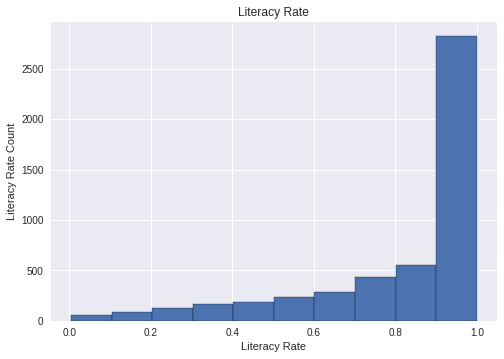

In [583]:
df['Literacy rate'].hist(edgecolor='black')
plt.title('Literacy Rate')
plt.xlabel("Literacy Rate")
plt.ylabel("Literacy Rate Count")


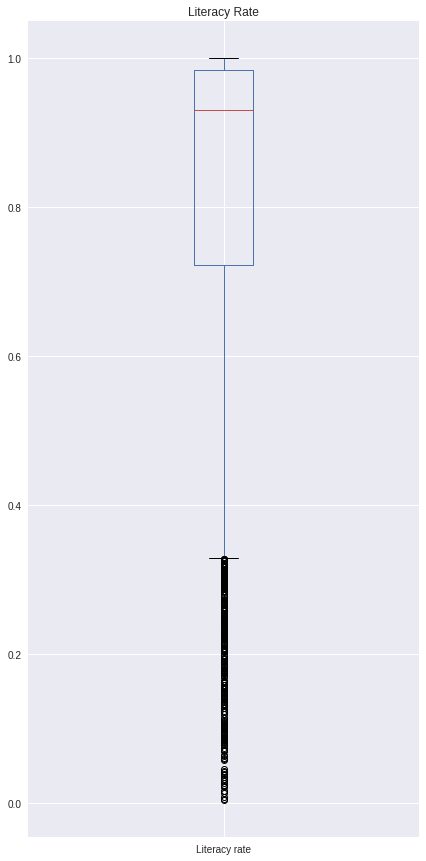

In [601]:
plt.figure(figsize=(7,15))
df.boxplot(column = 'Literacy rate');
plt.title('Literacy Rate');
# show's that the literacy rate is really high, with a LOT of outliers on the low end. but our median is arount .9 so that's a very high rate

(1652, 1651, 1652)

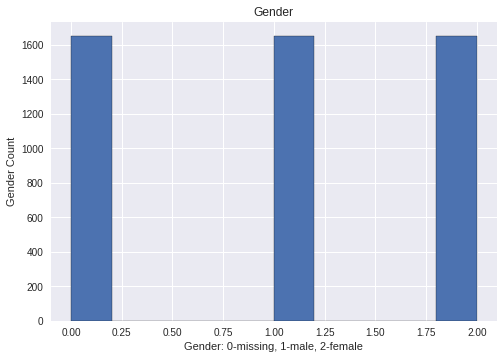

In [609]:
# Gender - since I already converted the numbers
df['Gender'].hist(edgecolor='black', bins=10)
plt.title('Gender')
plt.xlabel("Gender: 0-missing, 1-male, 2-female")
plt.ylabel("Gender Count")

len(df[df['Gender'] == 2]), len(df[df['Gender'] == 1]), len(df[df['Gender'] == 0])
# whelp = looks like we have a pertty even number of boys, girls, and missing


##### Step 1
- found age group to target (before we talked, I think I overthought the assigment) - but I kept it here cause it was a lot of work 😂

Text(0, 0.5, 'Ages Count')

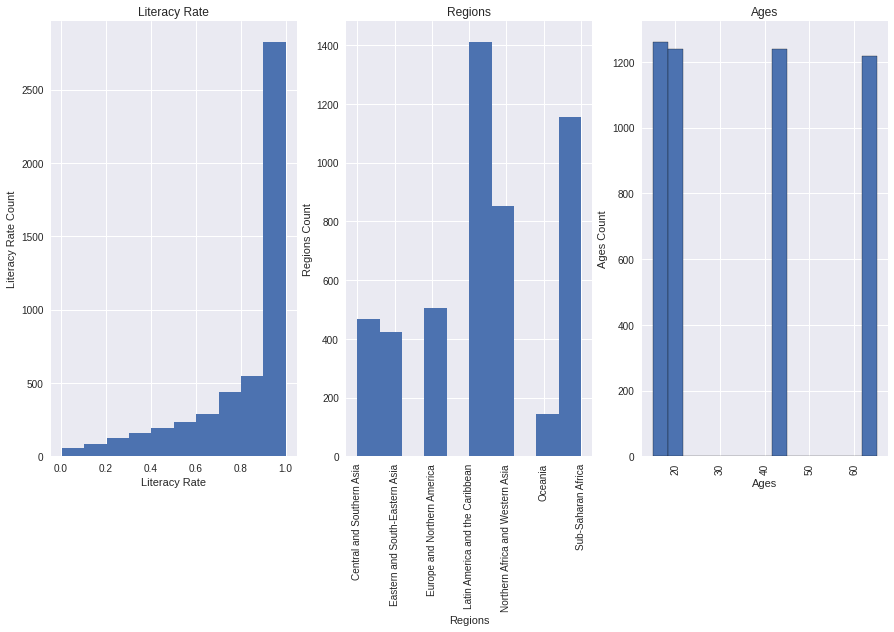

In [585]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1);
df['Literacy rate'].hist()
plt.title('Literacy Rate')
plt.xlabel("Literacy Rate")
plt.ylabel("Literacy Rate Count")

plt.subplot(1, 3, 2);
df['Region'].hist()
plt.xticks(rotation = 90)
plt.title('Regions')
plt.xlabel("Regions")
plt.ylabel("Regions Count")

plt.subplot(1, 3, 3);
df['Age'].hist(bins=15, edgecolor="black")
plt.xticks(rotation = 90)
plt.title('Ages')
plt.xlabel("Ages")
plt.ylabel("Ages Count")

# shows where most of the data come from
# Left one show that a lot of people are literate
# middle graph show's which region our data is falling in
# right shows how many people from each age group.
  # also intersting that the younger the generation the more literate they are
# So if we want to get the biggest bang for out buck find hgih population and low lr

In [566]:
counReg = df.groupby(['Age'])['Literacy rate'].mean().sort_values()
counReg.head(20)
# just seeing the actual numbers

Age
65    0.647954
44    0.843873
15    0.853163
19    0.919181
Name: Literacy rate, dtype: float64

In [567]:
df.groupby(['Region'])['Age'].mean()
# shows us the average age of each region.
# We know that 44 group is the one the has the lowest literacy rate 
# and most countries seem to have an average age of 35
# based on this it'll be good to go for tha ge group of 25 - 65 (aka 44). It falls in out mean range, and we know the older they are the more illiterate people we have

Region
Central and Southern Asia           35.687366
Eastern and South-Eastern Asia      34.297872
Europe and Northern America         35.750000
Latin America and the Caribbean     35.661702
Northern Africa and Western Asia    35.750000
Oceania                             35.750000
Sub-Saharan Africa                  35.480519
Name: Age, dtype: float64

In [568]:
counReg = df.groupby(['Region'])['Literacy rate'].mean().sort_values()
counReg.head(20)

# average literacy rate in regions

Region
Sub-Saharan Africa                  0.616073
Central and Southern Asia           0.717532
Northern Africa and Western Asia    0.851144
Eastern and South-Eastern Asia      0.882141
Latin America and the Caribbean     0.906581
Oceania                             0.911783
Europe and Northern America         0.979013
Name: Literacy rate, dtype: float64

In [569]:
counReg = df.groupby(['Age','Region'])['Literacy rate'].mean()
counReg.head(100)

# average literacy rate in regions and by age

Age  Region                          
15   Central and Southern Asia           0.753805
     Eastern and South-Eastern Asia      0.914152
     Europe and Northern America         0.982625
     Latin America and the Caribbean     0.931686
     Northern Africa and Western Asia    0.905557
     Oceania                             0.934925
     Sub-Saharan Africa                  0.674521
19   Central and Southern Asia           0.886825
     Eastern and South-Eastern Asia      0.965129
     Europe and Northern America         0.994472
     Latin America and the Caribbean     0.980961
     Northern Africa and Western Asia    0.962445
     Oceania                             0.960639
     Sub-Saharan Africa                  0.767625
44   Central and Southern Asia           0.719877
     Eastern and South-Eastern Asia      0.917781
     Europe and Northern America         0.990584
     Latin America and the Caribbean     0.934212
     Northern Africa and Western Asia    0.904772
     Oceania

#### 2. Two different types of multi exploratory visualizations

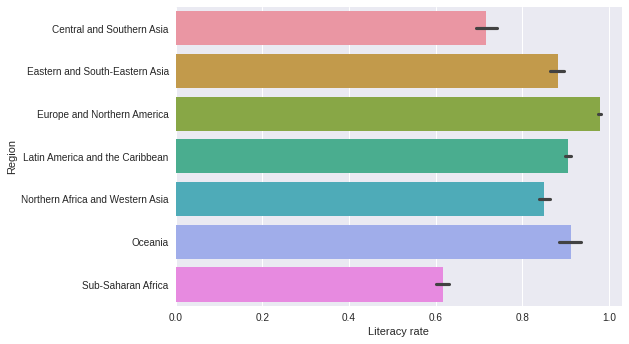

In [620]:
# plt.barh(df['Region'],df['Literacy rate'].values)
# why do you look so different?

sns.barplot(data=df, y="Region", x="Literacy rate") 

# Sub-Saharan Africa has the lowest literacy rate and Europe and north America have the highest

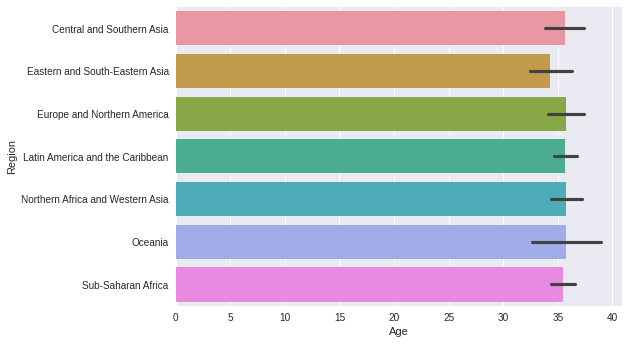

In [630]:
sns.barplot(data=df, y="Region", x="Age") 
# Average age is 35 for most countries 

In [628]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
index,,,,,,
0,Central and Southern Asia,Afghanistan,2011,15,2,0.176121
1,Central and Southern Asia,Afghanistan,2011,15,1,0.454171
2,Central and Southern Asia,Afghanistan,2011,15,0,0.317411
3,Central and Southern Asia,Afghanistan,2011,19,2,0.321132
4,Central and Southern Asia,Afghanistan,2011,19,1,0.618791


### Pre Thrusday meeting with instructor (I over thought the questions, but I learned a lot so I kept the data)

##### Step 2
- region(s) to target
- did all this before I met with you Thursday

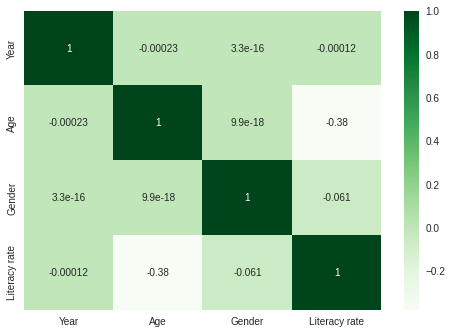

In [563]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens',annot= True)
# So no coorelation between year and literacy rates or genders or age
# our only coorelatoin we can really see is a slight coorelation between age and lr

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

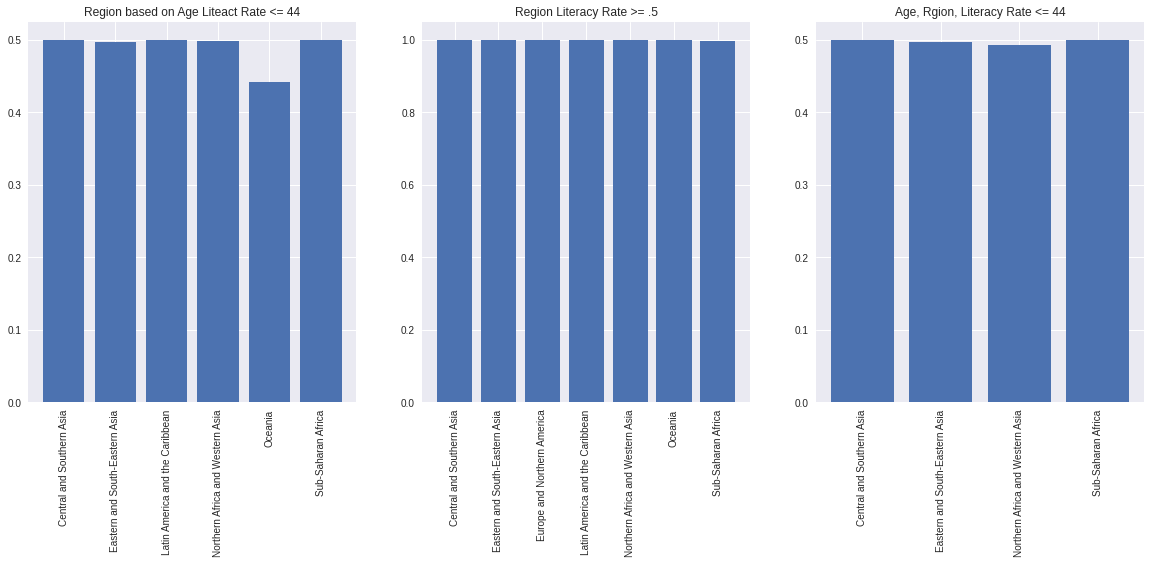

In [570]:
# df['Literacy rate'].value_counts()
lr = df['Literacy rate'] <= .5
age = df['Age'] <= 44
df2 = df[lr & age]

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1);
plt.title("Region based on Age Liteact Rate <= 44")
plt.bar(df[lr]['Region'].values, df[lr]['Literacy rate'].values)
plt.xticks(rotation = 90)

plt.subplot(1, 3, 2);
plt.title("Region Literacy Rate >= .5")
plt.bar(df[age]['Region'].values, df[age]['Literacy rate'].values)
plt.xticks(rotation = 90)

plt.subplot(1, 3, 3);
plt.title("Age, Rgion, Literacy Rate <= 44")
plt.bar(df2['Region'].values, df2['Literacy rate'].values)
plt.xticks(rotation = 90)

# shows the regions with reading rates lower than .5 in our target age group 44
# Oceanie meets those target values the most, but looking at where our data came we reieceve the samllest amout of data
   # may not be a country we focus on
# 'Oceanica', 'Centeral and southern Asia' and 'Eastern and South-Eastern Asia' is a smaller group, we can target them, but not the best option
# 'Latin America and the Carribbean', 'Northern Africa and Western Asia', Central and Southern Asia and 'Sub-Saharan Afarica'
  # 'Latin America and the Carribbean' is not on the 3rd firgure telling us that most of illiterate people are probably going to be older (remeber the younger the more literate)
    # 'Sub-Saharan Afarica' and 'Central and Southern Asia' - low numbers all around
    #  

In [571]:
len(df), len(df2), len(age), len(lr)
# when we use both filtes together we end up filtering too many much
# Tells us a lot of people aren't both - which is interesting
  # so either old and illeriate
  # or the areas illerate

(4955, 251, 4955, 4955)

In [572]:
# Sub-Saharan Afarica' all populations
ssa = df['Region'] == 'Sub-Saharan Africa'

old = df['Age'] >= 65
old_av = round((len(df[ssa & old])/4955) * 100, 2)

av = df['Age'] == 44
av_av = round((len(df[ssa & av])/4955) * 100, 2)

md = df['Age'] == 19
md_av = round((len(df[ssa & md])/4955) * 100, 2)

yg = df['Age'] == 15
yg_av = round((len(df[ssa & yg])/4955) * 100, 2)


print(len(df),len(df[ssa]), len(df[ssa & old]), len(df[ssa & av]), len(df[ssa & md]), len(df[ssa & yg]))
print()
print(f"+65: {old_av}%") # change in our data
print(f"44: {av_av}%") 
print(f"25-44: {md_av}%")
print(f"15: {yg_av}%") 
print()
print(f"{ old_av + av_av + md_av + yg_av}% difference in overall literacy rate") 


# about the age groups are pretty even
# every group but +65 have a +.90 literacy, 1/4 05 25% of the populataion is illerate

4955 1155 285 285 285 300

+65: 5.75%
44: 5.75%
25-44: 5.75%
15: 6.05%

23.3% difference in overall literacy rate


In [573]:
# 'Central and Southern Asia' all populations
csa = df['Region'] == 'Central and Southern Asia'

csa_old = df['Age'] >= 65
csa_old_av = round((len(df[csa & old])/4955) * 100, 2)

csa_av = df['Age'] == 44
csa_av_av = round((len(df[csa & av])/4955) * 100, 2)

csa_md = df['Age'] == 19
csa_md_av = round((len(df[csa & md])/4955) * 100, 2)

csa_yg = df['Age'] == 15
csa_yg_av = round((len(df[csa & yg])/4955) * 100, 2)

print(len(df),len(df[csa]), len(df[csa & csa_old]), len(df[csa & csa_av]), len(df[csa & csa_md]), len(df[csa & csa_yg]))
print()
print(f"+65: {csa_old_av}%") # change in our data
print(f"44: {csa_av_av}%") 
print(f"25-44: {csa_md_av}%")
print(f"15: {csa_yg_av}%") 
print()
print(f"{ csa_old_av + csa_av_av + csa_md_av + csa_yg_av}% difference in overall literacy rate") 

# about the age groups are pretty even
# So even though every group but latins have a +.90 literacy, 1/4 05 25% of the populataion is illerate
  # and since they're we have so much data from them it turns into a very large number
# Even though these guys have a large data pool, their numberes are elatviely high overall, so even with the increate there wouldn't be a huge impact

4955 467 116 117 117 117

+65: 2.34%
44: 2.36%
25-44: 2.36%
15: 2.36%

9.419999999999998% difference in overall literacy rate


In [574]:
# 'Latin american' older populations
latin = df['Region'] == 'Latin America and the Caribbean'
old = df['Age'] >= 65
av = df['Age'] == 44
md = df['Age'] == 19
yg = df['Age'] == 15

print(len(df),len(df[latin]), len(df[latin & old]), len(df[latin & av]), len(df[latin & md]), len(df[latin & yg]))
print(f"{round((len(df[latin & old])/4955) * 100, 2)}% difference") 

# about the age groups are pretty even
# every group but +65 have a +.90 literacy, 1/4 05 25% of the populataion is illerate
# though the latin amercain culture is high the only age group suffering in literacy is the +65, and even if the literacy rate would be to focus on this, it wouldn't have a huge imapct. Even if it is the largest data pool

4955 1410 351 351 351 357
7.08% difference


In [575]:
# 'Northern Africa and Western Asia' older populations
nawa = df['Region'] == 'Northern Africa and Western Asia'
old = df['Age'] >= 65
av = df['Age'] == 44
md = df['Age'] == 19
yg = df['Age'] == 15

print(len(df),len(df[nawa]), len(df[nawa & old]), len(df[nawa & av]), len(df[nawa & md]), len(df[nawa & yg]))
print(f"{round((len(df[nawa & old])/4955) * 100, 2)}% difference") 

# about the age groups are pretty even
# So even though every group but latins have a +.90 literacy, 1/4 05 25% of the populataion is illerate
  # and since they're we have so much data from them it turns into a very large number

4955 852 213 213 213 213
4.3% difference


In [576]:
# Oceania older popultion
ocean = df['Region'] == 'Oceania'
old = df['Age'] >= 65
av = df['Age'] == 44
md = df['Age'] == 19
yg = df['Age'] == 15

print(len(df),len(df[ocean]), len(df[ocean & old]), len(df[ocean & av]), len(df[ocean & md]), len(df[ocean & yg]))
print(f"{round((len(df[ocean & old])/4955) * 100, 2)}% difference") 

# Even though Oceania show up as the most illerate country, since the data pool is so small and only the oder populateion are illerate it will have almost zero affect overall

4955 144 36 36 36 36
0.73% difference


##### Step 3
  - Countries

  - Go to this country inside the reigino and teach the entire population - need to go this far?


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 <a list of 73 Text major ticklabel objects>)

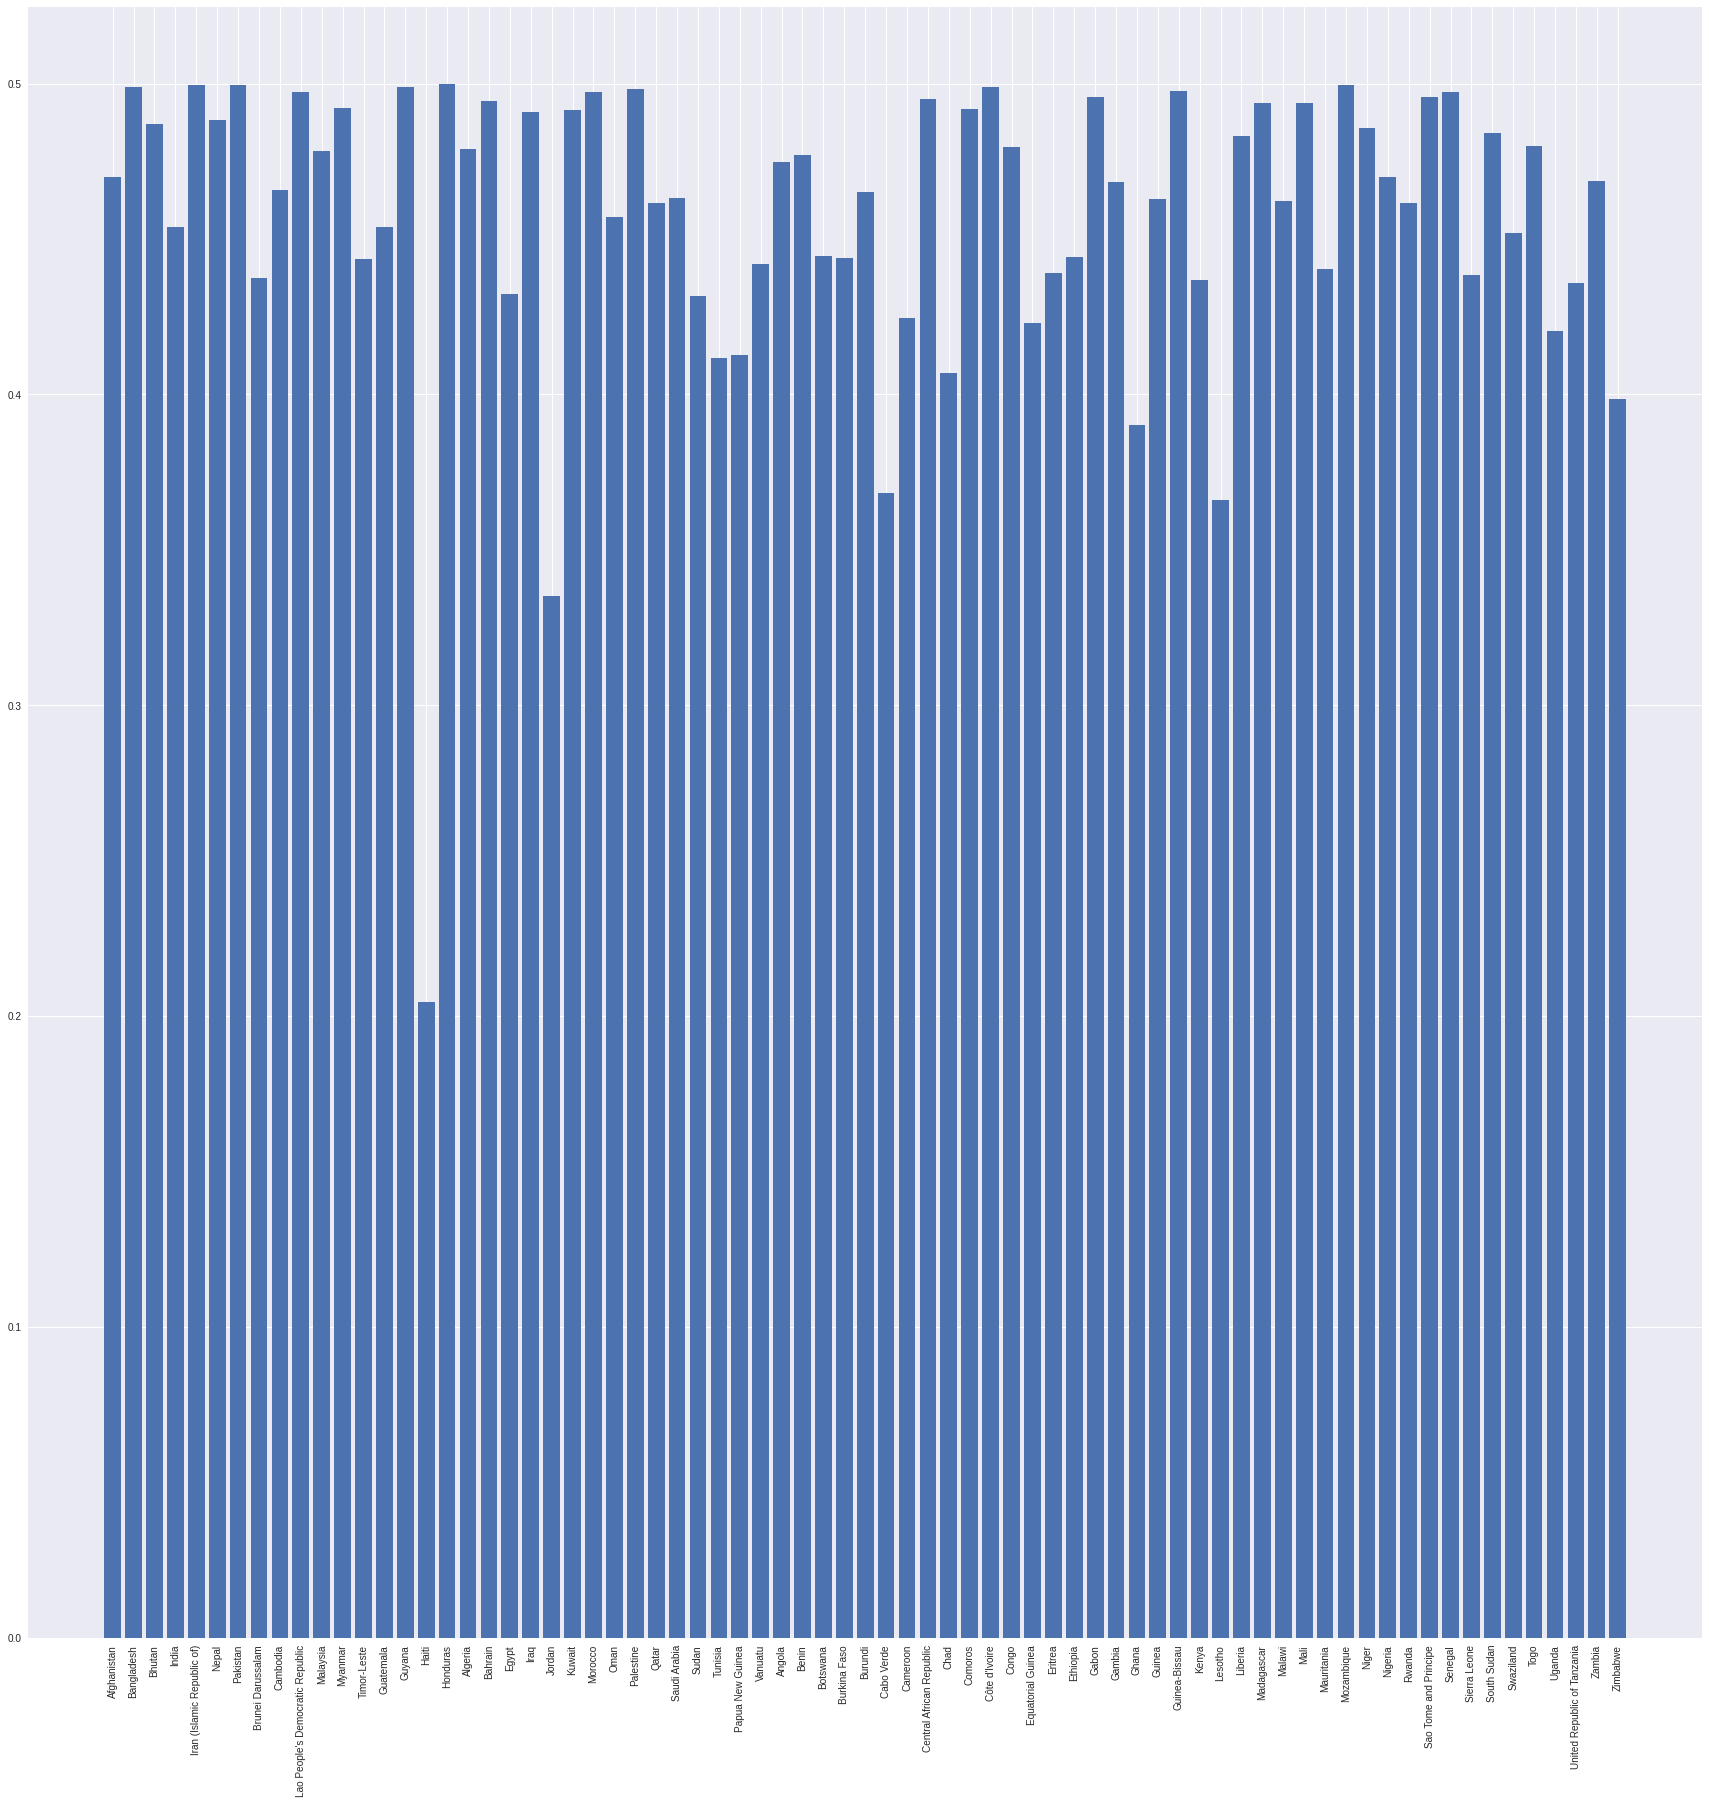

In [577]:
plt.figure(figsize=(30,30))
plt.bar(df[students]['Country'].values,df[students]['Literacy rate'].values)
plt.xticks(rotation = 90)
# this shows us the specific countries that have a  literacy rate less thab .5

##  Answer to the questions
1. Understand where they should focus their next project
2. Strategies to use to have the biggest impact in increasing youth literacy rates 

-- 
#### Who to Target
1a. only correlation is between age and literacy rate
1. Best data pool Sub Saraharn Africa, Central and Southern Asia, Latin America and the Caribbean, Northern Africa and Western Asia - best to target
  - older the more illerate
  - average country age is 35

  ** Best Region to focus on is 'Sub Saraharn Africa' Because every age group is suffereing and they're a realitvely large data pool.
  ** Second best thing would be to focus engery in all groups in 'Central and Southern Asia'
  ** Thrid: 'Latin America and the Caribbean' +65 age group 
  ** Fourth: Northern Africa and Western Asia' +65 age group


## References 

1. Project - https://colab.research.google.com/drive/16OrCBoBAbPQf-kOIRx0damRVO57X3hCW#scrollTo=pIbHN95jNFaH
  - referenced: replace
  - referenced: col function
2. Stack Overflow: astype - https://stackoverflow.com/questions/66295318/finding-sum-when-values-are-in-dtype-object
  - Meaning of dtype('O') -  https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas
  - Changing the dtype of a column - https://www.delftstack.com/howto/python-pandas/pandas-convert-object-to-float/
3. References builtin functions from lesson - https://colab.research.google.com/drive/1ge769cDr54uMHm6EQvYrCJ4h1YyylO9D
4. Print all Column names - https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
  - set a column to inde column - https://www.delftstack.com/howto/python-pandas/pandas-convert-object-to-float/
  - creataing and setting an index column -https://stackoverflow.com/questions/12168648/pandas-python-how-to-add-column-to-dataframe-for-index
  - set a certain column index to the index column - https://colab.research.google.com/drive/1ge769cDr54uMHm6EQvYrCJ4h1YyylO9D#scrollTo=k53j2nsyopVr
5. Removinga character form a string - https://note.nkmk.me/en/python-str-num-conversion/#:~:text=the%20following%20article.-,Convert%20a%20string%20to%20an%20integer%3A%20int(),numbers%20to%20an%20integer%20int%20.&text=A%20string%20containing%20.%20or%20%2C%20causes%20an%20error.&text=A%20comma%2Dseparated%20string%20can,with%20the%20empty%20string%20''%20).
6. plotting two values on a bar graph - https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
7. 